financial analytics

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color =sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')


In [151]:
import os
print(os.getcwd()) 


d:\pii\ML-Algo


In [152]:
s = pd.read_csv('Default.csv')


In [153]:
s.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [154]:
s.shape

(10000, 5)

In [155]:
s.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462905
50%,5000.50000,823.636973,34552.644800
75%,7500.25000,1166.308387,43807.729275
max,10000.00000,2654.322576,73554.233500


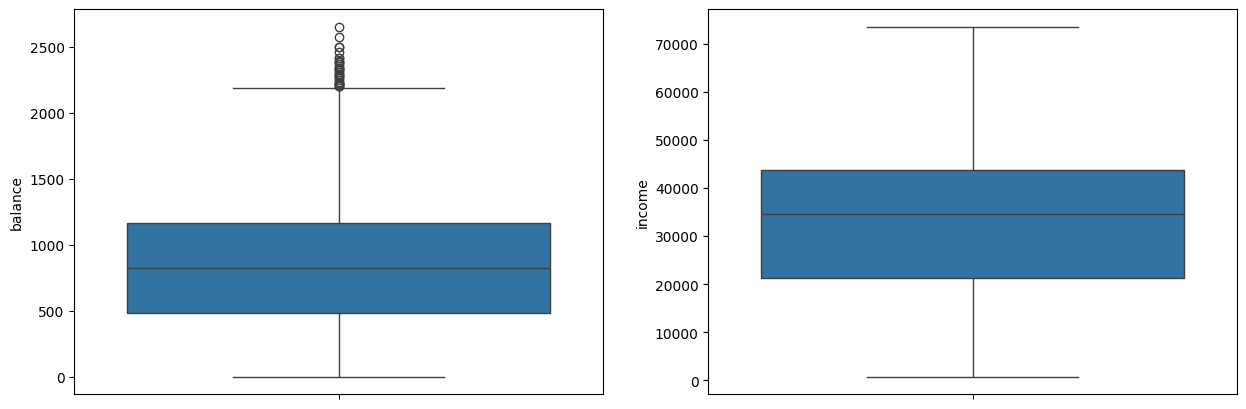

In [156]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=s['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=s['income'])
plt.show()

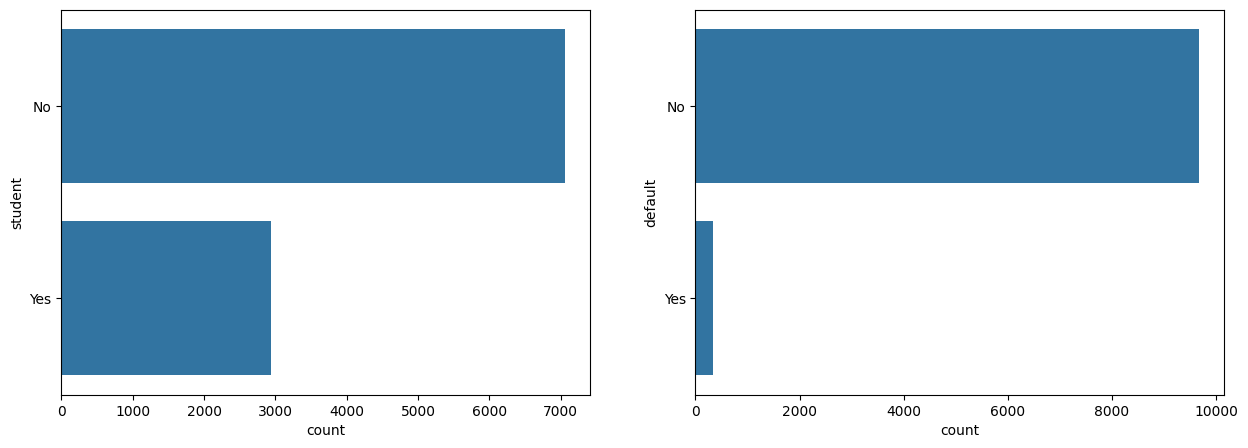

In [157]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(s['student'])

plt.subplot(1,2,2)
sns.countplot(s['default'])
plt.show()

In [158]:
s['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [159]:
s['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [160]:
s['student'].value_counts(normalize=True)

student
No     0.7056
Yes    0.2944
Name: proportion, dtype: float64

In [161]:
s['default'].value_counts(normalize=True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

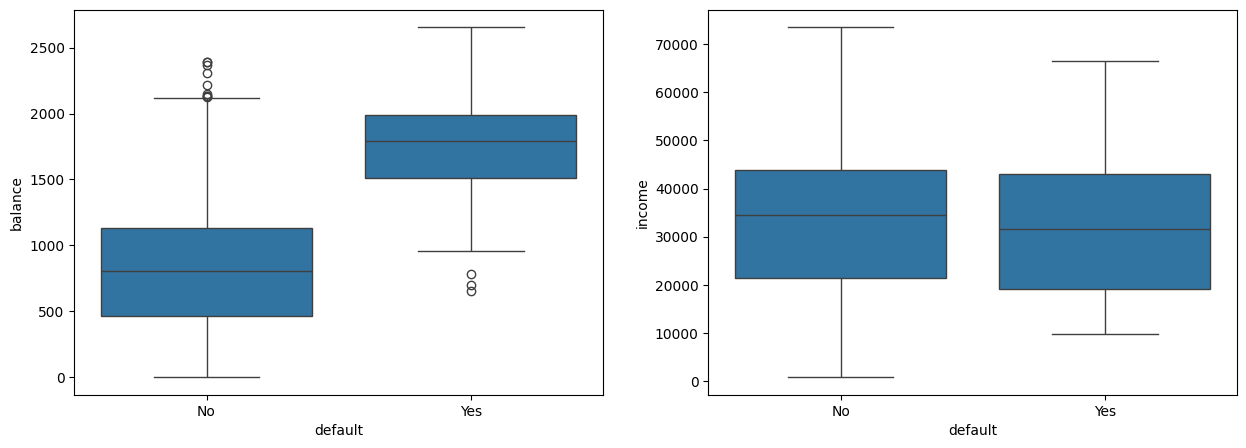

In [162]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=s['default'],y=s['balance'])

plt.subplot(1,2,2)
sns.boxplot(x=s['default'],y=s['income'])
plt.show()

In [163]:
pd.crosstab(s['student'],s['default'],normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


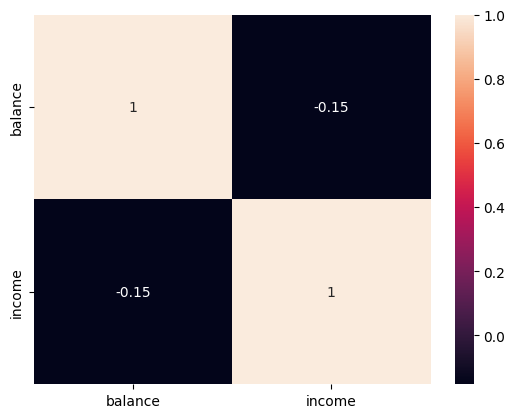

In [164]:
sns.heatmap(s[['balance','income']].corr(),annot = True)
plt.show()  #heatmap

In [165]:
s.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [166]:
Q1,Q3=s['balance'].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1 -1.5*(IQR)
UL=Q3+1.5*(IQR)

In [167]:
UL

2193.1743093

In [168]:
df=s[s['balance']>UL]

In [169]:
df

,Unnamed: 0,default,student,balance,income
173,174,Yes,Yes,2205.799521,14271.492250
1136,1137,Yes,No,2499.016750,51504.293960
1160,1161,Yes,Yes,2502.684931,14947.519750
1359,1360,Yes,No,2220.966201,40725.096210
1502,1503,Yes,Yes,2332.878254,11770.234120
1609,1610,Yes,Yes,2269.946966,18021.105950
2096,2097,Yes,Yes,2261.848162,20030.165120
2140,2141,No,Yes,2308.893236,19110.266410
2929,2930,Yes,Yes,2387.314867,28296.914720
3162,3163,Yes,Yes,2415.316994,17429.503370


In [170]:
df['default'].count()

31

In [171]:
df['default'].value_counts(normalize=True)

default
Yes    0.83871
No     0.16129
Name: proportion, dtype: float64

In [172]:
s['balance'] = np.where(s['balance']>UL,UL,s['balance'])

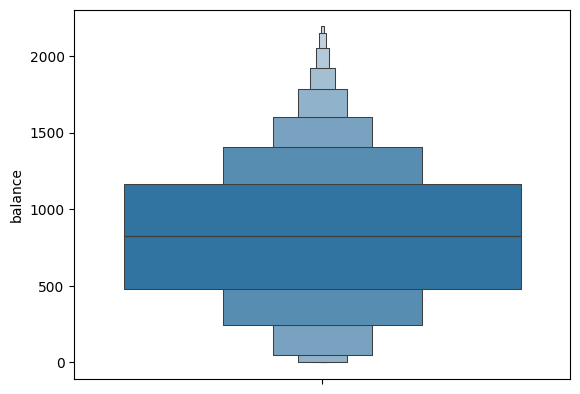

In [173]:
sns.boxenplot(y=s['balance'])
plt.show()

In [174]:
s= pd.get_dummies(s,drop_first=True)

In [175]:
s.head()

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.62507,False,False
1,2,817.180407,12106.13470,False,True
2,3,1073.549164,31767.13895,False,False
3,4,529.250605,35704.49394,False,False
4,5,785.655883,38463.49588,False,False


In [176]:
s.columns = ['balance', 'income', 'default', 'student', 'other_column']
print(s.head())


   balance       income      default  student  other_column
0        1   729.526495  44361.62507    False         False
1        2   817.180407  12106.13470    False          True
2        3  1073.549164  31767.13895    False         False
3        4   529.250605  35704.49394    False         False
4        5   785.655883  38463.49588    False         False


In [177]:
s = s.iloc[:, :4]
s.columns = ['balance', 'income', 'default', 'student']
print(s.head())


   balance       income      default  student
0        1   729.526495  44361.62507    False
1        2   817.180407  12106.13470    False
2        3  1073.549164  31767.13895    False
3        4   529.250605  35704.49394    False
4        5   785.655883  38463.49588    False


In [178]:
#now we can apply logistic algorithm on this dataset

apply logistic algorithm first we should divide our dataset into train and test dataset

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
x=s.drop('default',axis=1)
y=s['default']

In [181]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=21, 
)



In [182]:
print(x_train.shape)
print(x_test.shape)

(8000, 3)
(2000, 3)


In [183]:
print(y_train.value_counts(normalize=True).round(2))
print('')
print(y_test.value_counts(normalize=True).round(2))

default
52387.59199    0.0
27136.53798    0.0
52507.47963    0.0
54594.84671    0.0
58119.71660    0.0
              ... 
34412.11637    0.0
30948.80675    0.0
60826.99403    0.0
39708.03334    0.0
46389.34068    0.0
Name: proportion, Length: 8000, dtype: float64

default
19335.63404    0.0
23717.85111    0.0
35402.26796    0.0
16679.89397    0.0
32279.56843    0.0
              ... 
37088.83957    0.0
39532.90751    0.0
31150.37469    0.0
40716.17481    0.0
39407.91703    0.0
Name: proportion, Length: 2000, dtype: float64


In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
lr=LogisticRegression()

In [189]:
from imblearn.over_sampling import SMOTE


In [190]:
from sklearn.metrics import accuracy_score, classification_report
